# Logistic Regression Classifier 

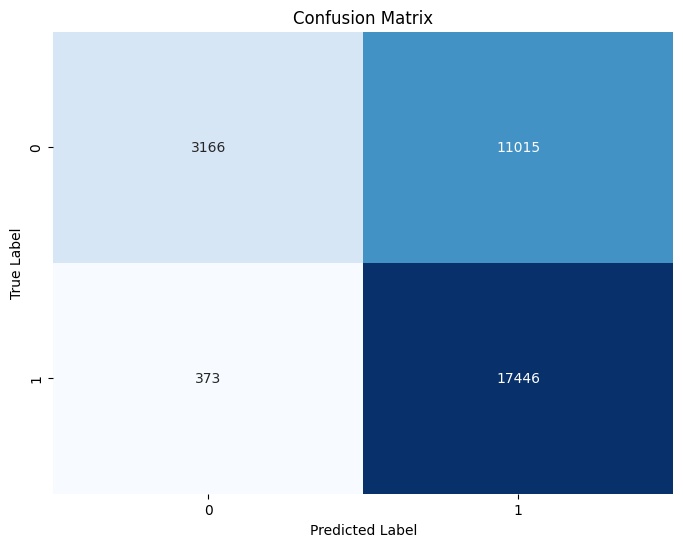

/var/folders/0c/p8t8gw0s0nj8_5tr34fz8mv40000gn/T/ipykernel_14145/3879251424.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')
/Users/bilgic/Desktop/fiz437e_project/project/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/bilgic/Desktop/fiz437e_project/project/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

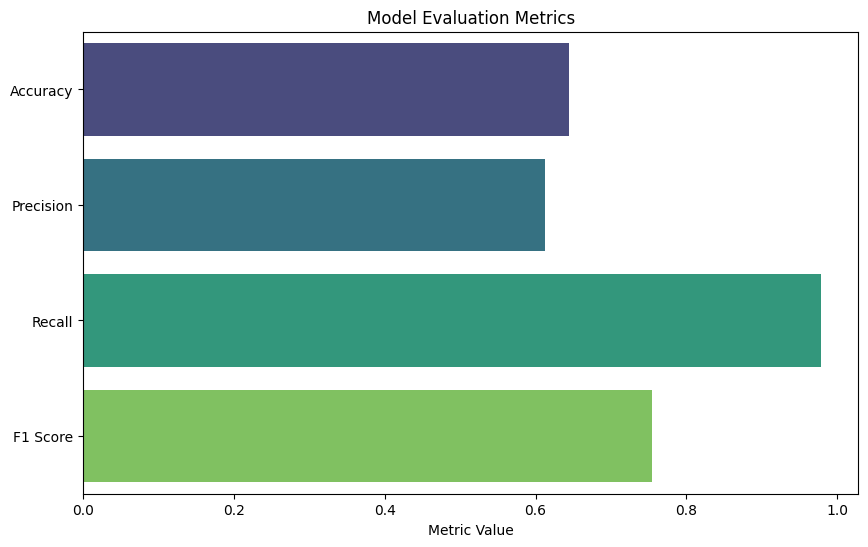

In [3]:
import pickle
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def load_ising_data():
   url = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/'
   file_name = "Ising2DFM_reSample_L40_T=All.pkl"
   label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"


   data = pickle.load(urlopen(url + file_name))
   data = np.unpackbits(data).reshape(-1, 1600).astype('int')
   data[data == 0] = -1
   labels = pickle.load(urlopen(url + label_file_name))


   return data, labels


def train_logistic_regression(X_train, y_train):
   model = LogisticRegression()
   model.fit(X_train, y_train)
   return model
def evaluate_model(model, X_test, y_test):
   y_pred = model.predict(X_test)
   conf_matrix = confusion_matrix(y_test, y_pred)
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   recall = recall_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)
  
   return conf_matrix, accuracy, precision, recall, f1


def plot_confusion_matrix(conf_matrix):
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted Label')
   plt.ylabel('True Label')
   plt.show()


def plot_evaluation_metrics(metrics_values, metrics_names):
   plt.figure(figsize=(10, 6))
   sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')
   plt.title('Model Evaluation Metrics')
   plt.xlabel('Metric Value')
   plt.show()


data, labels = load_ising_data()


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


model = train_logistic_regression(X_train, y_train)


conf_matrix, accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)


plot_confusion_matrix(conf_matrix)


metrics_values = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plot_evaluation_metrics(metrics_values, metrics_names)


# Random Forest Classifier (RFC)

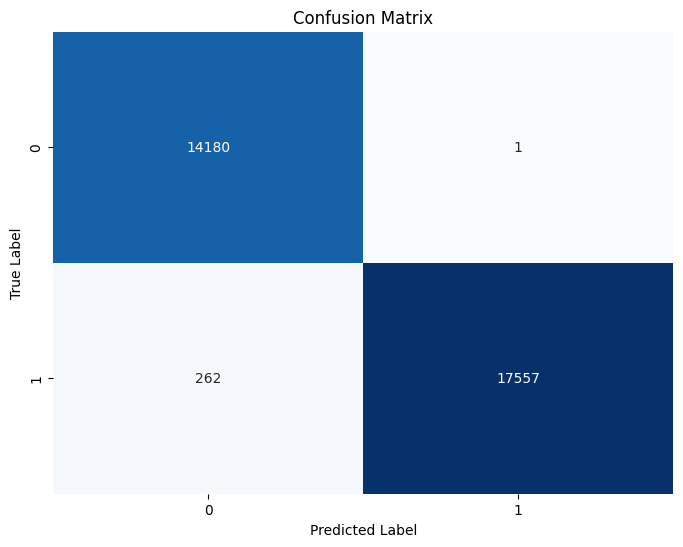

/var/folders/0c/p8t8gw0s0nj8_5tr34fz8mv40000gn/T/ipykernel_14145/3879251424.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')
/Users/bilgic/Desktop/fiz437e_project/project/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/bilgic/Desktop/fiz437e_project/project/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

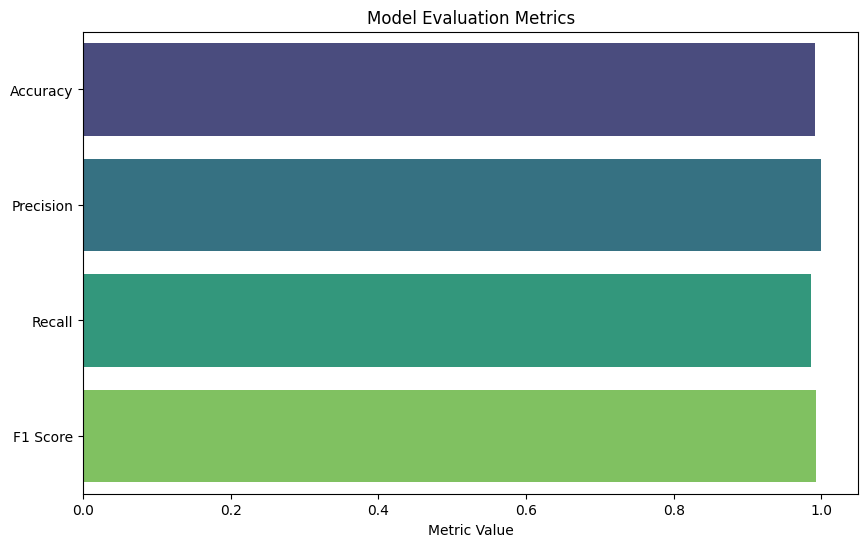

In [4]:
import pickle, os
from urllib.request import urlopen
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


def load_ising_data():
   url = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/'
   file_name = "Ising2DFM_reSample_L40_T=All.pkl"
   label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"


   data = pickle.load(urlopen(url + file_name))
   data = np.unpackbits(data).reshape(-1, 1600).astype('int')
   data[data == 0] = -1
   labels = pickle.load(urlopen(url + label_file_name))


   return data, labels
def train_random_forest(X_train, y_train):
   model = RandomForestClassifier(n_estimators=100, random_state=42)
   model.fit(X_train, y_train)
   return model


def evaluate_model(model, X_test, y_test):
   y_pred = model.predict(X_test)
   conf_matrix = confusion_matrix(y_test, y_pred)
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   recall = recall_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)
   return conf_matrix, accuracy, precision, recall, f1


def plot_confusion_matrix(conf_matrix):
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted Label')
   plt.ylabel('True Label')
   plt.show()


data, labels = load_ising_data()
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)




scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = train_random_forest(X_train, y_train)


conf_matrix, accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)


plot_confusion_matrix(conf_matrix)


metrics_values = [accuracy, precision, recall, f1]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plot_evaluation_metrics(metrics_values, metrics_names)

# Multi-Layer Perceptron Classifier (MLP)

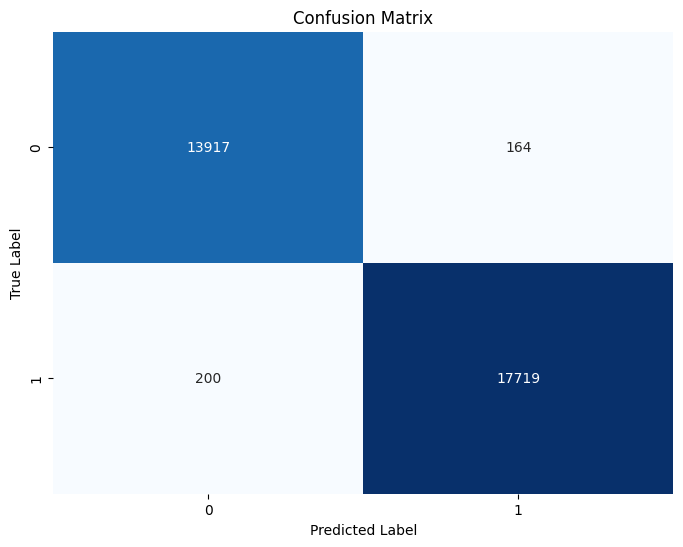

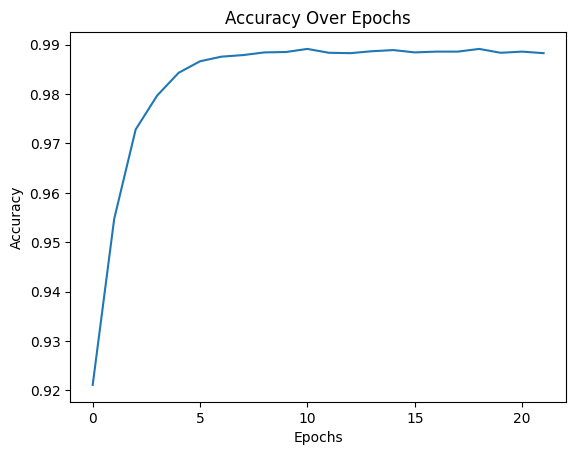

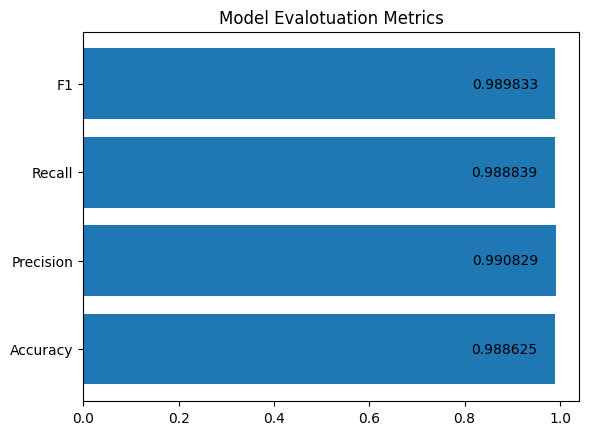

In [5]:
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier


def read_t_data(t=0.25,root="../data/"):
    if t > 0.:
        data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
    else:
        data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=All.pkl','rb'))
    return np.unpackbits(data).astype(int).reshape(-1,1600)
def read_all_data(root="../data/"):
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=All.pkl','rb'))
    label = pickle.load(open(root+'Ising2DFM_reSample_L40_T=All_labels.pkl','rb'))
    return np.unpackbits(data).astype(int).reshape(-1,1600), label

data, label = read_all_data()
idx = np.random.permutation(len(data))
data, label = data[idx], label[idx]
data[data == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

def train_MLPClassifier(X_train, y_train):
   model = MLPClassifier(solver='sgd', alpha=1e-3, hidden_layer_sizes=(5, 2), random_state=1773,
                         early_stopping=True)
   model.fit(X_train, y_train)
   return model


def evaluate_model(model, X_test, y_test):
   y_pred = model.predict(X_test)
   conf_matrix = confusion_matrix(y_test, y_pred)
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   recall = recall_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)
  
   return conf_matrix, accuracy, precision, recall, f1


def plot_confusion_matrix(conf_matrix):
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
   plt.title('Confusion Matrix')
   plt.xlabel('Predicted Label')
   plt.ylabel('True Label')
   plt.show()


def plot_evaluation_metrics(metrics_values, metrics_names):
   plt.figure(figsize=(10, 6))
   sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')
   plt.title('Model Evaluation Metrics')
   plt.xlabel('Metric Value')
   plt.show()

model = train_MLPClassifier(X_train, y_train)
conf_matrix, accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
plot_confusion_matrix(conf_matrix)

plt.plot(model.validation_scores_)
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

fig, ax = plt.subplots()
ax.set_title("Model Evalotuation Metrics")
bars = ax.barh(("Accuracy", "Precision", "Recall", "F1"), (accuracy, precision, recall, f1))
ax.bar_label(bars,padding=-60);
plt.show()

# Convolutional Neural Network (CNN)

/Users/bilgic/Desktop/fiz437e_project/project/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Data Array:
 [[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 0 0]]
Shape of Data Array: (160000, 1600)

Labels Array:
 [1 1 1 ... 0 0 0]
Shape of Labels Array: (160000,)

First Sample in Data Array:
 [0 0 0 ... 0 0 0]

Last Sample in Data Array:
 [1 1 1 ... 1 0 0]
Shape of Magnetization Array: (160000,)
Shape of Sample Size Array: (160000,)
Temperature Array: [0.25 0.25 0.25 ... 4.   4.   4.  ]
Length of Temperature Array: 160000, Shape of Temperature Array: (160000,)


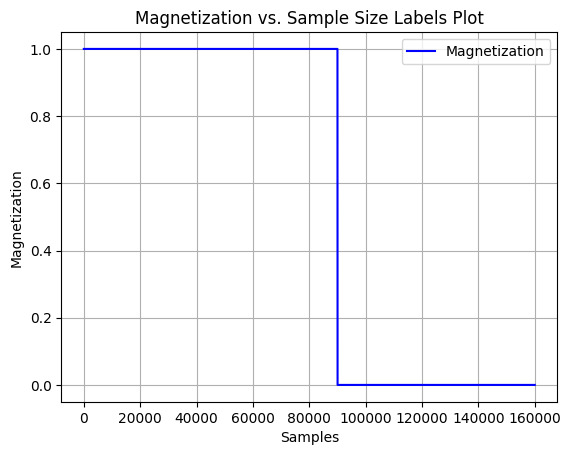

Slice 1:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 0.25

Slice 2:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 0.5

Slice 3:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 0.75

Slice 4:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 1.0

Slice 5:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 1.25

Slice 6:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 1.5

Slice 7:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 1.75

Slice 8:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 2.0

Slice 9:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 2.25

Slice 10:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 2.5

Slice 11:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 2.75

Slice 12:
Data Shape: (10000, 1600)
Labels Shape: (10000,)
Temperature Value: 3.0

Slice 1

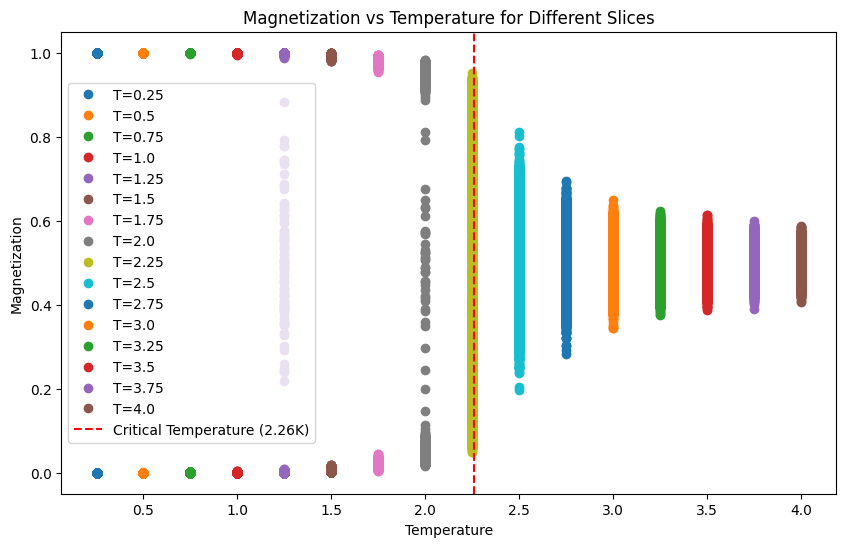

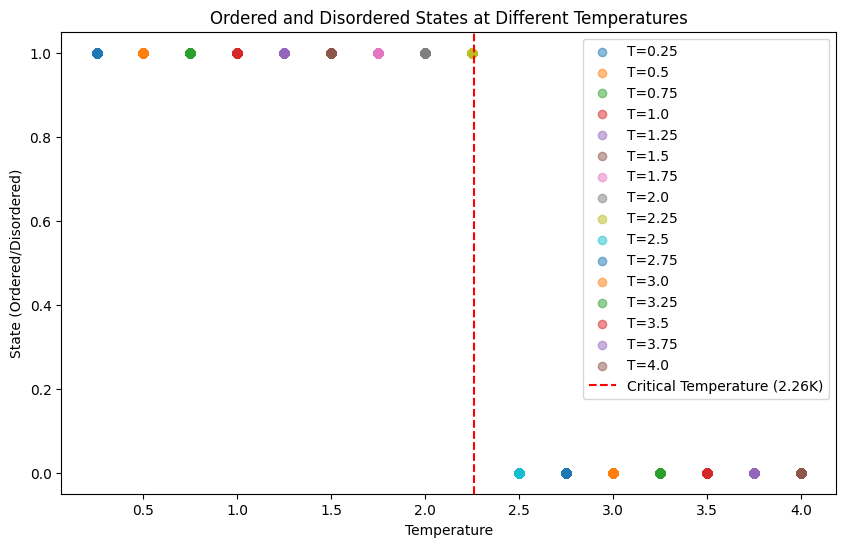

Critical Temperature Region: (2.25, 2.5001)
Number of Data Points in Critical Temperature Region: 10000
Ordered Data Temperature Range: (0.25, 2.25)
Number of Ordered Data Points: 90000
Unordered Data Temperature Range: (2.5001, 4.001)
Number of Unordered Data Points: 60000
Ordered Data Set:
x_ordered_train.shape: (67500,)
x_ordered_test.shape: (22500,)
y_ordered_train.shape: (67500,)
y_ordered_test.shape: (22500,)

Unordered Data Set:
x_unordered_train.shape: (45000,)
x_unordered_test.shape: (15000,)
y_unordered_train.shape: (45000,)
y_unordered_test.shape: (15000,)
Critical Region Data:
x_critical_train.shape: (7500,)
x_critical_test.shape: (2500,)
y_critical_train.shape: (7500,)
y_critical_test.shape: (2500,)

Ordered Data:
x_ordered_train.shape: (67500,)
x_ordered_test.shape: (22500,)
y_ordered_train.shape: (67500,)
y_ordered_test.shape: (22500,)

Unordered Data:
x_unordered_train.shape: (45000,)
x_unordered_test.shape: (15000,)
y_unordered_train.shape: (45000,)
y_unordered_test.sh

2024-01-23 22:25:53.593117: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-23 22:25:53.593185: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-23 22:25:53.593200: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-23 22:25:53.593538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-23 22:25:53.593917: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/3


2024-01-23 22:25:55.543639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3165/3165 [==============================] - 21s 7ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 4.8971e-04 - val_accuracy: 1.0000
Epoch 2/3
3165/3165 [==============================] - 21s 7ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 4.1191e-05 - val_accuracy: 1.0000
Epoch 3/3
3165/3165 [==============================] - 21s 7ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.7230e-04 - val_accuracy: 1.0000
Test Loss: 0.0001
Test Accuracy: 1.0000


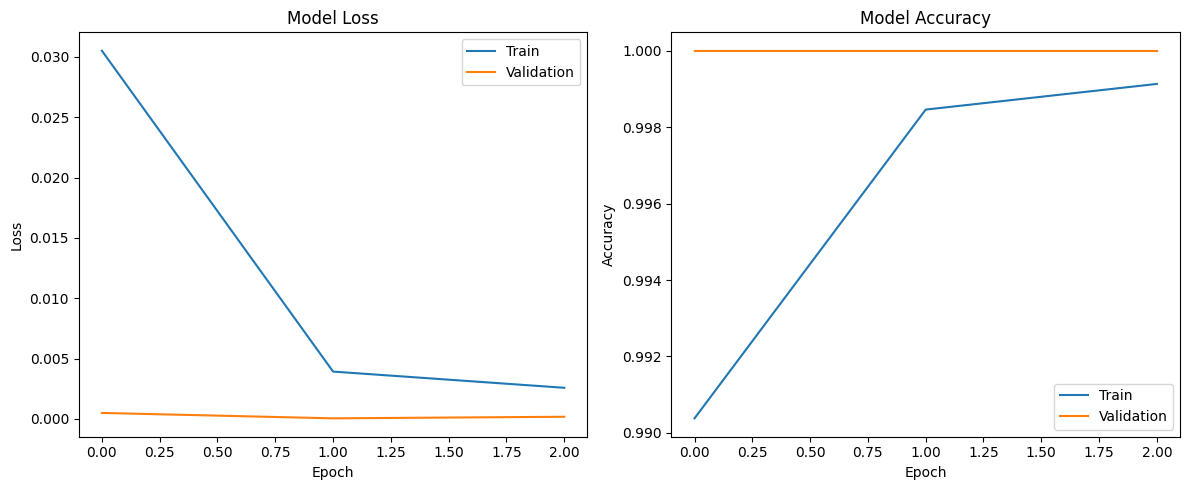

In [6]:
# %%
import numpy as np
import pickle
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import regularizers, optimizers
from keras.callbacks import ModelCheckpoint 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


# %%
url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/'
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "Ising2DFM_reSample_L40_T=All.pkl" 
# The labels are obtained from the following file:
label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"

#DATA
# pickle reads the file and returns the Python object (1D array, compressed bits)
# Decompress array and reshape for convenience
# map 0 state to -1 (Ising variable can take values +/-1)
def load_data_from_url(url):
    request = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    with urlopen(request) as f:
        return pickle.load(f)
# Load data and labels
data = load_data_from_url(url_main + data_file_name)
data = np.unpackbits(data).reshape(-1, 1600)
data = data.astype('int')
#data[np.where(data == 0)] = -1 # map 0 state to -1

#LABELS (convention is 1 for ordered states and 0 for disordered states)
# pickle reads the file and returns the Python object (here just a 1D array with the binary labels)
labels = load_data_from_url(url_main + label_file_name)
#labels[labels == 0] = -1  # Map 0 state to -1

# %%
# Print the entire data array and its shape
print("Data Array:\n", data)
print("Shape of Data Array:", data.shape)

# Print the entire labels array and its shape
print("\nLabels Array:\n", labels)
print("Shape of Labels Array:", labels.shape)

# Print the first sample from the data array
print("\nFirst Sample in Data Array:\n", data[0])

# Print the last sample from the data array
print("\nLast Sample in Data Array:\n", data[-1])

# %%
# Calculate magnetization for each sample in the data by taking the mean along the rows
mag = np.mean(data, axis=1)
print(f"Shape of Magnetization Array: {mag.shape}")

# Create an array to represent sample sizes
sample_size = np.arange(len(data))
print(f"Shape of Sample Size Array: {sample_size.shape}")

# Create an array to represent temperature
temp_range = np.arange(0.25, 4.25, 0.25)
# Repeat the temperature values to match the length of the data (assuming each slice contains 10,000 samples)
tc = np.repeat(temp_range, 10000)
print(f"Temperature Array: {tc}")
print(f"Length of Temperature Array: {len(tc)}, Shape of Temperature Array: {tc.shape}")

# %%
# Plot the 'labels' data with a blue line
plt.plot(labels, c='blue', label='Magnetization')

# Set labels for the x and y axes
plt.xlabel('Samples')
plt.ylabel('Magnetization')

# Set the title of the plot
plt.title('Magnetization vs. Sample Size Labels Plot')

# Add a legend to the plot
plt.legend()

# Add a grid to the plot
plt.grid(True)

# Display the plot
plt.show()


# %%
# Create a DataFrame
df = pd.DataFrame({
    'Data': list(data),
    'Labels': labels,
    'Temperature': tc
})

# %%
# Define a function for slicing the data
def slice_data(df, num_slices):
    # Calculate the size of each slice
    slice_size = len(df) // num_slices
    sliced_data = []         # List to store sliced data
    sliced_labels = []       # List to store sliced labels
    sliced_temperatures = [] # List to store sliced temperatures

    # Loop through the specified number of slices
    for i in range(num_slices):
        start_idx = i * slice_size
        end_idx = (i + 1) * slice_size if (i < num_slices - 1) else len(df)
        
        # Slice the data, labels, and get the unique temperature value for this slice
        sliced_data.append(df['Data'][start_idx:end_idx].tolist())
        sliced_labels.append(df['Labels'][start_idx:end_idx].tolist())
        sliced_temperatures.append(df['Temperature'][start_idx:end_idx].unique()[0])

    # Return the sliced data, labels, and temperatures
    return sliced_data, sliced_labels, sliced_temperatures

# Define the number of slices
num_slices = 16

# Apply the slicing function to the DataFrame 'df'
sliced_data, sliced_labels, sliced_temperatures = slice_data(df, num_slices)

# Display information about each slice
for i, data_slice in enumerate(sliced_data):
    print(f"Slice {i + 1}:")
    print(f"Data Shape: {np.array(data_slice).shape}")
    print(f"Labels Shape: {np.array(sliced_labels[i]).shape}")
    print(f"Temperature Value: {sliced_temperatures[i]}\n")


# %%
# Loop through the slices of data
for i in range(num_slices):
    slice_data = np.array(sliced_data[i])
    slice_labels = np.array(sliced_labels[i])
    slice_temperature = sliced_temperatures[i]

    # Create a DataFrame for the current slice
    df_slice = pd.DataFrame(slice_data)
    df_slice['Label'] = slice_labels  # Add a 'Label' column
    df_slice['Temperature'] = slice_temperature  # Add a 'Temperature' column

    # Display information about the DataFrame
    print(f"DataFrame for Slice {i+1}")
    
    # Print the first few rows of the DataFrame
    print(df_slice.head())
    
    # Print the shape (number of rows and columns) of the DataFrame
    print(f"Shape of Slice {i+1}: {df_slice.shape}\n")


# %%
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the figure
plt.figure(figsize=(10, 6))

# Loop over the slices of data
for i in range(num_slices):
    slice_data = np.array(sliced_data[i])
    slice_labels = np.array(sliced_labels[i])
    slice_temperature = sliced_temperatures[i]

    # Calculate Magnetization
    mag = np.mean(slice_data, axis=1)
    
    # Plot the Magnetization vs Temperature
    plt.plot([slice_temperature] * len(mag), mag, 'o', label=f'T={slice_temperature}')

# Add a vertical line at the critical temperature (2.26K) for reference
plt.axvline(x=2.26, color='red', linestyle='--', label='Critical Temperature (2.26K)')

# Set labels for the x and y axes
plt.xlabel('Temperature')
plt.ylabel('Magnetization')

# Set the title of the plot
plt.title('Magnetization vs Temperature for Different Slices')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


# %%
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Loop through the slices of data
for i in range(num_slices):
    slice_labels = np.array(sliced_labels[i])
    slice_temperature = sliced_temperatures[i]

    # Create a scatter plot of state (Ordered/Disordered) vs Temperature
    plt.scatter([slice_temperature] * len(slice_labels), slice_labels, alpha=0.5, label=f'T={slice_temperature}')

# Add a vertical dashed red line at the critical temperature (2.26K)
plt.axvline(x=2.26, color='red', linestyle='--', label='Critical Temperature (2.26K)')

# Set labels for the x and y axes
plt.xlabel('Temperature')
plt.ylabel('State (Ordered/Disordered)')

# Set the title of the plot
plt.title('Ordered and Disordered States at Different Temperatures')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


# %%
# Define the critical temperature
critical_temp = 2.26

# Define temperature ranges for the ordered and unordered regions
lower_bound_ordered = 0.25
upper_bound_ordered = 2.25
lower_bound_unordered = 2.5001
upper_bound_unordered = 4.001

# Separate the data into ordered and unordered regions
ordered_data = df[(df['Temperature'] >= lower_bound_ordered) & (df['Temperature'] <= upper_bound_ordered)]
unordered_data = df[(df['Temperature'] >= lower_bound_unordered) & (df['Temperature'] <= upper_bound_unordered)]

# Define the critical temperature region
critical_data = df[(df['Temperature'] > upper_bound_ordered) & (df['Temperature'] < lower_bound_unordered)]

# Print the temperature range and the number of data points in the critical temperature region
critical_temp_range = (upper_bound_ordered, lower_bound_unordered)
critical_data_count = len(critical_data)
print(f"Critical Temperature Region: {critical_temp_range}")
print(f"Number of Data Points in Critical Temperature Region: {critical_data_count}")


# %%
# Print the temperature range and the number of data points for the ordered data
ordered_temp_range = (lower_bound_ordered, upper_bound_ordered)
ordered_data_count = len(ordered_data)
print(f"Ordered Data Temperature Range: {ordered_temp_range}")
print(f"Number of Ordered Data Points: {ordered_data_count}")

# Print the temperature range and the number of data points for the unordered data
unordered_temp_range = (lower_bound_unordered, upper_bound_unordered)
unordered_data_count = len(unordered_data)
print(f"Unordered Data Temperature Range: {unordered_temp_range}")
print(f"Number of Unordered Data Points: {unordered_data_count}")


# %%
# After splitting the ordered data, check the dimensions
x_ordered_train, x_ordered_test, y_ordered_train, y_ordered_test = train_test_split(
    ordered_data['Data'].values, ordered_data['Labels'].values, random_state=42)

# Print the dimensions to ensure the data is split correctly
print("Ordered Data Set:")
print(f"x_ordered_train.shape: {x_ordered_train.shape}")
print(f"x_ordered_test.shape: {x_ordered_test.shape}")
print(f"y_ordered_train.shape: {y_ordered_train.shape}")
print(f"y_ordered_test.shape: {y_ordered_test.shape}")

# After splitting the unordered data, check the dimensions
x_unordered_train, x_unordered_test, y_unordered_train, y_unordered_test = train_test_split(
    unordered_data['Data'].values, unordered_data['Labels'].values, random_state=42)

# Print the dimensions to ensure the data is split correctly
print("\nUnordered Data Set:")
print(f"x_unordered_train.shape: {x_unordered_train.shape}")
print(f"x_unordered_test.shape: {x_unordered_test.shape}")
print(f"y_unordered_train.shape: {y_unordered_train.shape}")
print(f"y_unordered_test.shape: {y_unordered_test.shape}")


# %%
# Define the critical temperature
critical_temp = 2.26

# Define temperature ranges for the ordered and unordered regions
lower_bound_ordered = 0.25
upper_bound_ordered = 2.25
lower_bound_unordered = 2.5001
upper_bound_unordered = 4.001

# Separate the data into ordered and unordered regions
ordered_data = df[(df['Temperature'] >= lower_bound_ordered) & (df['Temperature'] <= upper_bound_ordered)]
unordered_data = df[(df['Temperature'] >= lower_bound_unordered) & (df['Temperature'] <= upper_bound_unordered)]

# Define the critical temperature region
critical_data = df[(df['Temperature'] > upper_bound_ordered) & (df['Temperature'] < lower_bound_unordered)]

# Set a flag to determine whether to split the data
split = True

# Split the data based on the 'split' flag
if split:
    x_critical_train, x_critical_test, y_critical_train, y_critical_test = train_test_split(
        critical_data['Data'].values, critical_data['Labels'].values, random_state=42)
else:
    x_critical_train, x_critical_test = critical_data['Data'].values, None
    y_critical_train, y_critical_test = critical_data['Labels'].values, None

# Split the ordered and unordered data into training and testing sets
x_ordered_train, x_ordered_test, y_ordered_train, y_ordered_test = train_test_split(
    ordered_data['Data'].values, ordered_data['Labels'].values, random_state=42)

x_unordered_train, x_unordered_test, y_unordered_train, y_unordered_test = train_test_split(
    unordered_data['Data'].values, unordered_data['Labels'].values, random_state=42)

# Print the results
print("Critical Region Data:")
print(f"x_critical_train.shape: {x_critical_train.shape}")
print(f"x_critical_test.shape: {x_critical_test.shape if split else 'Not Split'}")
print(f"y_critical_train.shape: {y_critical_train.shape}")
print(f"y_critical_test.shape: {y_critical_test.shape if split else 'Not Split'}")

print("\nOrdered Data:")
print(f"x_ordered_train.shape: {x_ordered_train.shape}")
print(f"x_ordered_test.shape: {x_ordered_test.shape}")
print(f"y_ordered_train.shape: {y_ordered_train.shape}")
print(f"y_ordered_test.shape: {y_ordered_test.shape}")

print("\nUnordered Data:")
print(f"x_unordered_train.shape: {x_unordered_train.shape}")
print(f"x_unordered_test.shape: {x_unordered_test.shape}")
print(f"y_unordered_train.shape: {y_unordered_train.shape}")
print(f"y_unordered_test.shape: {y_unordered_test.shape}")


# %%
# Concatenate the training sets from the ordered and unordered regions
x_train = np.concatenate((x_ordered_train, x_unordered_train))
y_train = np.concatenate((y_ordered_train, y_unordered_train))

# Concatenate the test sets from the ordered and unordered regions
x_test = np.concatenate((x_ordered_test, x_unordered_test))
y_test = np.concatenate((y_ordered_test, y_unordered_test))

# Print the shapes of the combined sets
print("Combined Training Set:")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print("\nCombined Test Set:")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


# %%
# Specify the value of L
L = 40

# Initialize lists to store the reshaped images
x_train_images = []
x_test_images = []

# Reshape the combined training set
for i in range(x_train.shape[0]):
    image = x_train[i].reshape(L, L, 1)
    x_train_images.append(image)

# Reshape the combined test set
for i in range(x_test.shape[0]):
    image = x_test[i].reshape(L, L, 1)
    x_test_images.append(image)

# Convert the lists to numpy arrays
x_train_images = np.array(x_train_images)
x_test_images = np.array(x_test_images)

# Check the dimensions of the reshaped data
print("Combined Non-Critical Training Set:")
print(f"x_train_images.shape: {x_train_images.shape}")

print("Combined Non-Critical Test Set:")
print(f"x_test_images.shape: {x_test_images.shape}")


# %%
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(3, (3, 3), activation='tanh', input_shape=(L, L, 1)))
# You can uncomment the following lines to add max-pooling and additional convolutional layers
# model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2 (You can uncomment this section if needed)
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3 (You can uncomment this section if needed)
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting

# Fully Connected Layers (You can uncomment this section if needed)
# model.add(layers.Dense(64, activation='relu'))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


# %%
# Train the model using training data and labels and obtain the history object
history = model.fit(x_train_images, y_train, 
                    epochs=3,  # Number of training epochs
                    validation_split=0.1)  # 10% validation split


# %%
# Test the model on test data and labels
score = model.evaluate(x_test_images, y_test, verbose=0)

# Print the test loss and test accuracy
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")


# %%
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation loss values
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

# Plot training & validation accuracy values
ax2.plot(history.history['accuracy'], label='Train')
ax2.plot(history.history['val_accuracy'], label='Validation')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



